In [1]:
from wann_genetic.tools import ExperimentSeries
from util import accuracy_swarmplot

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [3]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [4]:
data_dir = "../data/02_iris_edge_signs"
series = ExperimentSeries.from_spec_file(data_dir)
series.discover_data_dir()
df = series.assemble_stats()

In [5]:
x_col = 'edge_signs_enabled'
x_label = 'Edge signs enabled'

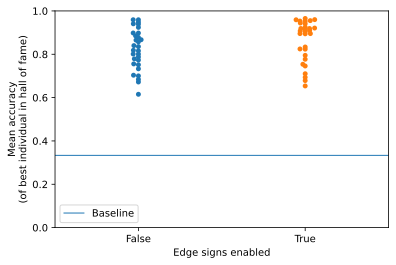

MAX:accuracy.mean: 0.8642644444444445 vs. 0.8229177777777779
1.6978195122349964 0.09490369183113201


In [6]:
accuracy_swarmplot(data=df, x=x_col, xlabel=x_label)

sep = df['edge_signs_enabled']
column = 'MAX:accuracy.mean'

a = df[ sep][column]
b = df[~sep][column]
print(f'{column}: {a.mean()} vs. {b.mean()}')

t, p = ttest_ind(a, b, equal_var=False)
print (t, p)

In [7]:
data = list()

for i, c in enumerate(series.configurations()):
    env = series.configuration_env(c)
    
    ind_stats = list()   
    
    with env.open_data():
        env.load_hof()

    for ind in env.hall_of_fame:
        ind.express()
        d = ind.metadata()
        ind_stats.append(d)

    ind_stats = pd.DataFrame(ind_stats)

    stats = dict()
    for prefix, func in [('MAX', np.max), ('MIN', np.min), ('STD', np.std), ('MEAN', np.mean)]:
        for col in ind_stats.columns:
            stats[f'{prefix}:{col}'] = func(ind_stats[col])
    
    stats.update(series.flat_values(c))
    stats['_configuration'] = c
    data.append(stats)
    
hof_df = pd.DataFrame(data=data)
hof_df['exp'] = hof_df.agg('{0[distribution/_name]}, {0[seed]}'.format, axis=1)
hof_df.index = hof_df['exp']


MAX:n_hidden: 10.066666666666666 vs. 18.5
-4.266383460111525 8.207588096989895e-05


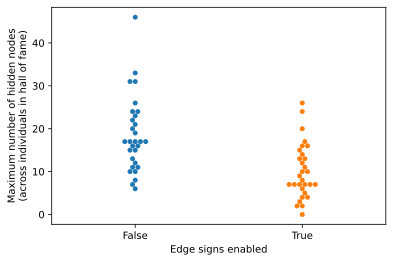

In [8]:
sep = hof_df['edge_signs_enabled']
column = 'MAX:n_hidden'

a = hof_df[ sep][column]
b = hof_df[~sep][column]
print(f'{column}: {a.mean()} vs. {b.mean()}')

t, p = ttest_ind(a, b, equal_var=False)
print (t, p)

sns.swarmplot(x=x_col, y=column, data=hof_df)
plt.xlabel(x_label)
plt.ylabel('Maximum number of hidden nodes\n(across individuals in hall of fame)')
plt.show()

MEAN:n_hidden: 8.163333333333332 vs. 13.090000000000002
-2.875721727926602 0.00572899846188036


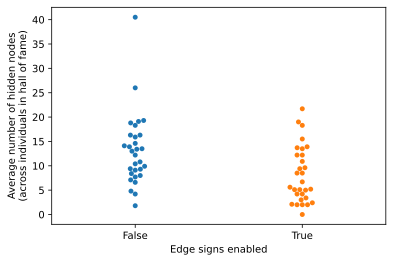

In [9]:
sep = hof_df['edge_signs_enabled']
column = 'MEAN:n_hidden'

a = hof_df[ sep][column]
b = hof_df[~sep][column]
print(f'{column}: {a.mean()} vs. {b.mean()}')

t, p = ttest_ind(a, b, equal_var=False)
print (t, p)

sns.swarmplot(x=x_col, y=column, data=hof_df)
plt.xlabel(x_label)
plt.ylabel('Average number of hidden nodes\n(across individuals in hall of fame)')
plt.show()

MEAN:n_enabled_edges: 21.170000000000005 vs. 24.34666666666667
-1.0810146561263558 0.28417026555185915


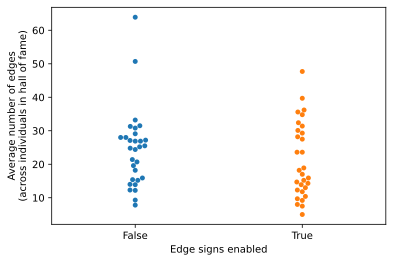

In [10]:
sep = hof_df['edge_signs_enabled']
column = 'MEAN:n_enabled_edges'

a = hof_df[ sep][column]
b = hof_df[~sep][column]
print(f'{column}: {a.mean()} vs. {b.mean()}')

t, p = ttest_ind(a, b, equal_var=False)
print (t, p)


sns.swarmplot(x=x_col, y=column, data=hof_df)
plt.xlabel(x_label)
plt.ylabel('Average number of edges\n(across individuals in hall of fame)')
plt.show()

MAX:n_enabled_edges: 24.066666666666666 vs. 32.2
-2.60349832294702 0.011703519504534235


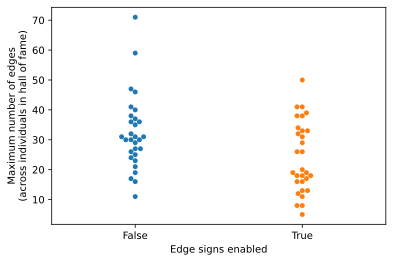

In [11]:
sep = hof_df['edge_signs_enabled']
column = 'MAX:n_enabled_edges'

a = hof_df[ sep][column]
b = hof_df[~sep][column]
print(f'{column}: {a.mean()} vs. {b.mean()}')

t, p = ttest_ind(a, b, equal_var=False)
print (t, p)


sns.swarmplot(x=x_col, y=column, data=hof_df)
plt.xlabel(x_label)
plt.ylabel('Maximum number of edges\n(across individuals in hall of fame)')
plt.show()

In [12]:
print(series.hyperparam_table(tablefmt='grid'))

+----------------------------------------------------+--------------------------------------+
| Parameter                                          | Value                                |
+====================================================+======================================+
| Population size                                    | 100                                  |
+----------------------------------------------------+--------------------------------------+
| Number of generations                              | 200                                  |
+----------------------------------------------------+--------------------------------------+
| Initial population                                 | fully connected                      |
|                                                    | (edges have 5% chance of             |
|                                                    | being enabled)                       |
+----------------------------------------------------+------

# Uniform only

In [13]:
u_df = df[df['distribution/_name'] == 'uniform -2,2']
u_hof_df = hof_df[hof_df['distribution/_name'] == 'uniform -2,2']

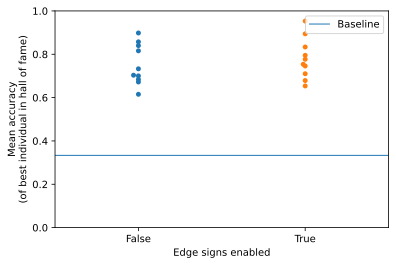

MAX:accuracy.mean: 0.7796266666666667 vs. 0.7520000000000001
0.6580705360774641 0.5188214456715516


In [14]:
accuracy_swarmplot(data=u_df, x=x_col, xlabel=x_label)

sep = u_df['edge_signs_enabled']
column = 'MAX:accuracy.mean'

a = u_df[ sep][column]
b = u_df[~sep][column]
print(f'{column}: {a.mean()} vs. {b.mean()}')

t, p = ttest_ind(a, b, equal_var=False)
print (t, p)

MEAN:n_hidden: 3.94 vs. 10.12
-3.1143174070675395 0.00711717188093972


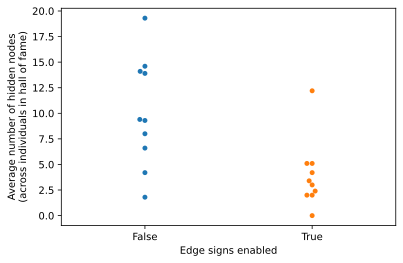

In [15]:
sep = u_hof_df['edge_signs_enabled']
column = 'MEAN:n_hidden'

a = u_hof_df[ sep][column]
b = u_hof_df[~sep][column]
print(f'{column}: {a.mean()} vs. {b.mean()}')

t, p = ttest_ind(a, b, equal_var=False)
print (t, p)

sns.swarmplot(x=x_col, y=column, data=u_hof_df)
plt.xlabel(x_label)
plt.ylabel('Average number of hidden nodes\n(across individuals in hall of fame)')
plt.show()

# Lognormal only

In [16]:
l_df = df[df['distribution/_name'] == 'uniform -2,2']
l_hof_df = hof_df[hof_df['distribution/_name'] == 'uniform -2,2']

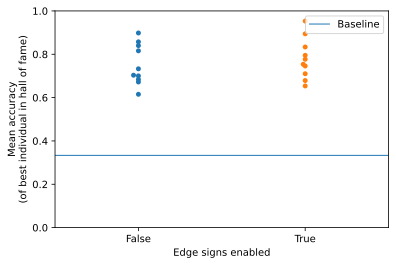

MAX:accuracy.mean: 0.7796266666666667 vs. 0.7520000000000001
0.6580705360774641 0.5188214456715516


In [17]:
accuracy_swarmplot(data=l_df, x=x_col, xlabel=x_label)

sep = l_df['edge_signs_enabled']
column = 'MAX:accuracy.mean'

a = l_df[ sep][column]
b = l_df[~sep][column]
print(f'{column}: {a.mean()} vs. {b.mean()}')

t, p = ttest_ind(a, b, equal_var=False)
print (t, p)

MEAN:n_hidden: 3.94 vs. 10.12
-3.1143174070675395 0.00711717188093972


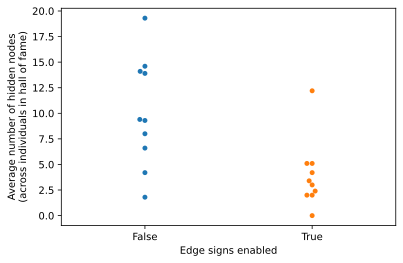

In [18]:
sep = l_hof_df['edge_signs_enabled']
column = 'MEAN:n_hidden'

a = l_hof_df[ sep][column]
b = l_hof_df[~sep][column]
print(f'{column}: {a.mean()} vs. {b.mean()}')

t, p = ttest_ind(a, b, equal_var=False)
print (t, p)

sns.swarmplot(x=x_col, y=column, data=l_hof_df)
plt.xlabel(x_label)
plt.ylabel('Average number of hidden nodes\n(across individuals in hall of fame)')
plt.show()